In [7]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_21/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

## Resumen
<div id="caja4" style="float:left;width: 100%;">
  <div style="float:right;width: 15%;"><img src="../../../common/icons/en_resumen.png" style="align:right"/> </div>
  <div style="float:right;width: 85%;"><label></label></div>
</div>

En este módulo presentamos la regresión lineal como modelo para estimar la relación lineal entre dos tipos de variables, una variable de respuesta u objetivo denominada "$Y$" y otra u otras variables explicativas $X_i$.


La **regresión lineal** simple intenta predecir una respuesta cuantitativa "$Y$" en base a una única variable predictora X. Asume que hay aproximadamente una relación lineal entre X e Y. Sim embargo podemos hacer una generalización de la regresión lineal simple construyendo un modelo de regresión lineal múltiple generalizado:

$Y= \beta _0  + \beta _1X_1 + \beta _2X_2 + \beta _3X_3 ... + \beta _pX_p + \epsilon $

Para cada coeficiente podemos definir el estimador del mismo y  pronosticar la variable de respuesta para una observación con valores nuevos como:

$\hat{y}= \hat{\beta _0}  + \hat{\beta _1}X_1 + \hat{\beta _2}X_2 + \hat{\beta _3}X_3 ... + \hat{\beta _p}X_p $

Elegimos los valores para los estimadores de los coeficientes  que minimizan la suma de residuos al cuadrado:

$RSS = \sum_{i=1}^{n} (y - \hat{y})^{2}$

Bajo ciertas condiciones, conocidas como los supuestos de **Gauss-Markov**, los coeficientes de la regresión son lineales, insesgados y tienen varianza mínima.


### Repaso de los supuestos de Gauss-Markov

1. El modelo es lineal en los parámetros.
2. Los estimadores de los parámetros poblacionales se estiman a partir de una muestra aleatoria.
3. No hay colinealidad perfecta entre las variables explicativas.
4. El valor esperado del error es 0 para cualquier valor de la variable explicativa.
5. Para cualquier valor de la variable explicativa, el error tienen la misma varianza (homocedasticidad).
6. El error es independiente de las variables explicativas y se distribuye normalmente.
$\epsilon \sim N (0,\sigma_\epsilon)$
7. No existe autocorrelación entre los errores de dos observaciones diferentes condicionadas a X.
$Cov(\epsilon_i,\epsilon_h|X)=0$


### Acerca del Dataset 
Hoy vamos a investigar nuevamente el dataset de propiedades de la ciudad de  Boston. 

En particular aplicaremos la regresion lineal a un problema inmobiliario. El objetivo de la presente notebook es familiarizarnos con el testeo de los supuestos de Gauss-Markov.



In [8]:
import pandas as pd
from sklearn.datasets import load_boston

# load data
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# Solo selecciono LSTAT
X = df[['RM']]
y = pd.Series(boston.target, name='MEDV')

# inspect data
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


### Ajuste del modelo usando Stats-Models

In [9]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.49e-74
Time:                        11:05:30   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Durante la presentación teorica abordamos la regresion lineal y vimos que los estimadores los coeficientes de la regresión son lineales, insesgados y tienen varianza mínima.

### Linealidad del modelo.
Se supone que la variable dependiente ($y$) es una función lineal de las variables independientes ($X$, "features o características") especificadas en el modelo. La especificación del modelo debe ser lineal en sus parámetros. Ajustar un modelo lineal a datos con patrones no lineales da como resultado graves errores de predicción, especialmente fuera de muestra (datos no utilizados para entrenar el modelo).

Para detectar la falta de linealidad, se pueden inspeccionar gráficas de valores observados frente a valores pronosticados o residuales frente a valores predichos. El resultado deseado es que los puntos se distribuyen simétricamente alrededor de una línea diagonal en la primera gráfica o alrededor de una línea horizontal en la última. En ambos casos con una varianza aproximadamente constante.

Observar un patrón "inclinado" indica que el modelo comete errores sistemáticos cada vez que realiza predicciones inusualmente grandes o pequeñas. Cuando el modelo contiene muchas características, la no linealidad también se puede revelar mediante patrones sistemáticos en las gráficas de los residuos frente a las características individuales.

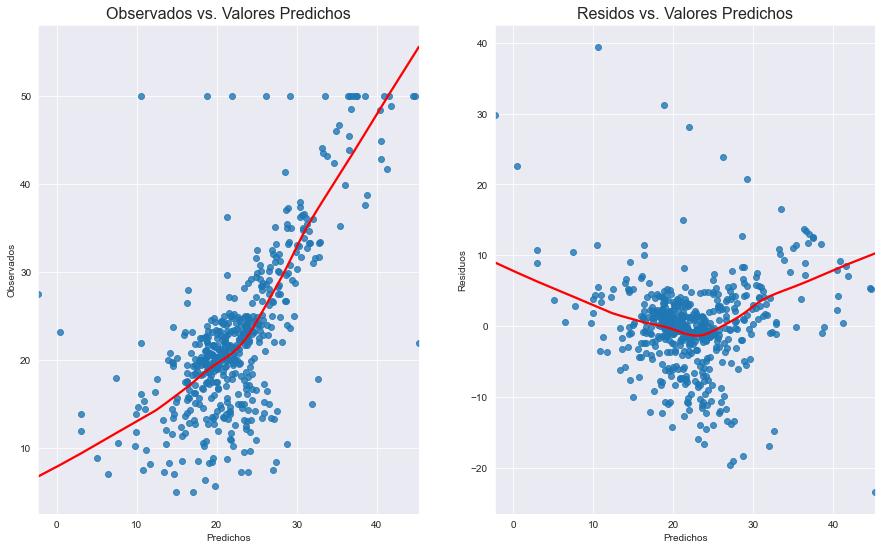

In [10]:
%matplotlib inline
#%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    funcion para visualizar e identificar supuestos de linealidad sobre la regression lineal
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observados vs. Valores Predichos', fontsize=16)
    ax[0].set(xlabel='Predichos', ylabel='Observados')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residos vs. Valores Predichos', fontsize=16)
    ax[1].set(xlabel='Predichos', ylabel='Residuos')
    
linearity_test(lin_reg, y)    

Cuando gráficamente vemos que  el supuesto de linealidad no se cumple podemos aplicar alguna metologia para sortear este inconveniente:
Posibles soluciones:
* Transformaciones no lineales sobre las variables dependientes/independiente.
* Agregar features con transformaciones (por ejemplo una version de la variable al cuadrado, o arcsin, logaritmica, etc)
* Agregar features que no fueron considerados actualemente.


### Esperanza de los residuos igual a cero.

La esperanza o media de los residuos igual a cero es facil de obtener en python:

In [11]:
lin_reg.resid.mean()
#-8.499130253335981e-15

-2.4388045382042568e-14

### Sin multicolinealidad (perfecta)
En otras palabras, las características deben ser linealmente independientes. ¿Qué significa eso en la práctica? No deberíamos poder usar un modelo lineal para predecir con precisión una característica usando otra. Tomemos $X_1$ y $X_2$ como ejemplos de características. Podría suceder que X1es una combinacion lineal de X2 (X1 = 2 + 3 * X2), lo que viola la suposición.

Un escenario a tener en cuenta es la "la trampa", cuando utilizamos variables "dummies" para codificar una característica categórica y no omitimos el nivel de referencia del modelo. Esto da como resultado una correlación perfecta entre las variables dummies y el término constante. Por eso en la práctica generamos K-1 variables dummies (Esto lo veremos en mas detalle en la práctica de dummies).

La multicolinealidad puede estar presente en el modelo, siempre que no sea "perfecta". En el primer caso, las estimaciones son menos eficientes pero insesgadas. Las estimaciones serán menos precisas y altamente sensibles a conjuntos particulares de datos.


Para detectar multicolinealidad poder utilizar el factor de inflación de varianza ([VIF](https://en.wikipedia.org/wiki/Variance_inflation_factor)). Sin entrar en demasiados detalles, la interpretación de VIF es la siguiente: la raíz cuadrada de un VIF de una variable dada muestra cuánto más grande es el error estándar, en comparación con lo que sería si ese predictor no estuviera correlacionado con las otras características del modelo . Si no se correlacionan características, todos los valores para VIF serán 1.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,RM
vif,1.0


Para lidiar con la multicolinealidad, debemos eliminar iterativamente las características con valores altos de **VIF**. Una regla general para la eliminación podría ser VIF mayor de 10 (5 también es común). Otra posible solución es usar PCA para reducir las características a un conjunto más pequeño de componentes no correlacionados.


Tip: también podemos ver la matriz de correlación de características para identificar dependencias entre ellas.

### Homocedasticidad (varianza igual) de residuos
Cuando los residuos no tienen una varianza constante (exhiben heterocedasticidad), es difícil determinar la verdadera desviación estándar de los errores de pronóstico, lo que generalmente resulta en intervalos de confianza demasiado amplios / estrechos. Por ejemplo, si la varianza de los residuos aumenta con el tiempo, los intervalos de confianza para las predicciones fuera de muestra serán poco realistas. Otro efecto de la heterocedasticidad también podría ser poner demasiado peso en un subconjunto de datos al estimar los coeficientes, el subconjunto en el que la varianza del error fue mayor.



Para investigar si los residuos presentan igual varianza, podemos observar una gráfica de los residuos (o residuos estandarizados) frente a los valores predichos (ajustados) como hicimos en la figura anterior cuando chequeabamos la linealidad del modelo. Lo que debería alarmarnos es el caso cuando los residuos crecen ya sea en función del valor pronosticado o del tiempo (en el caso de series de tiempo).

También podemos usar dos pruebas estadísticas: Breusch-Pagan y Goldfeld-Quandt. En ambos, la hipótesis nula supone la homocedasticidad y un valor p por debajo de cierto nivel (como 0.05) indica que debemos rechazar el nulo a favor de la heterocedasticidad.


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  0.006987
p-value                        0.933383
f-value                        0.006960
f p-value                      0.933547

 Goldfeld-Quandt test ----
                    value
F statistic  4.034297e+00
p-value      1.031130e-26

 Residuals plots ----


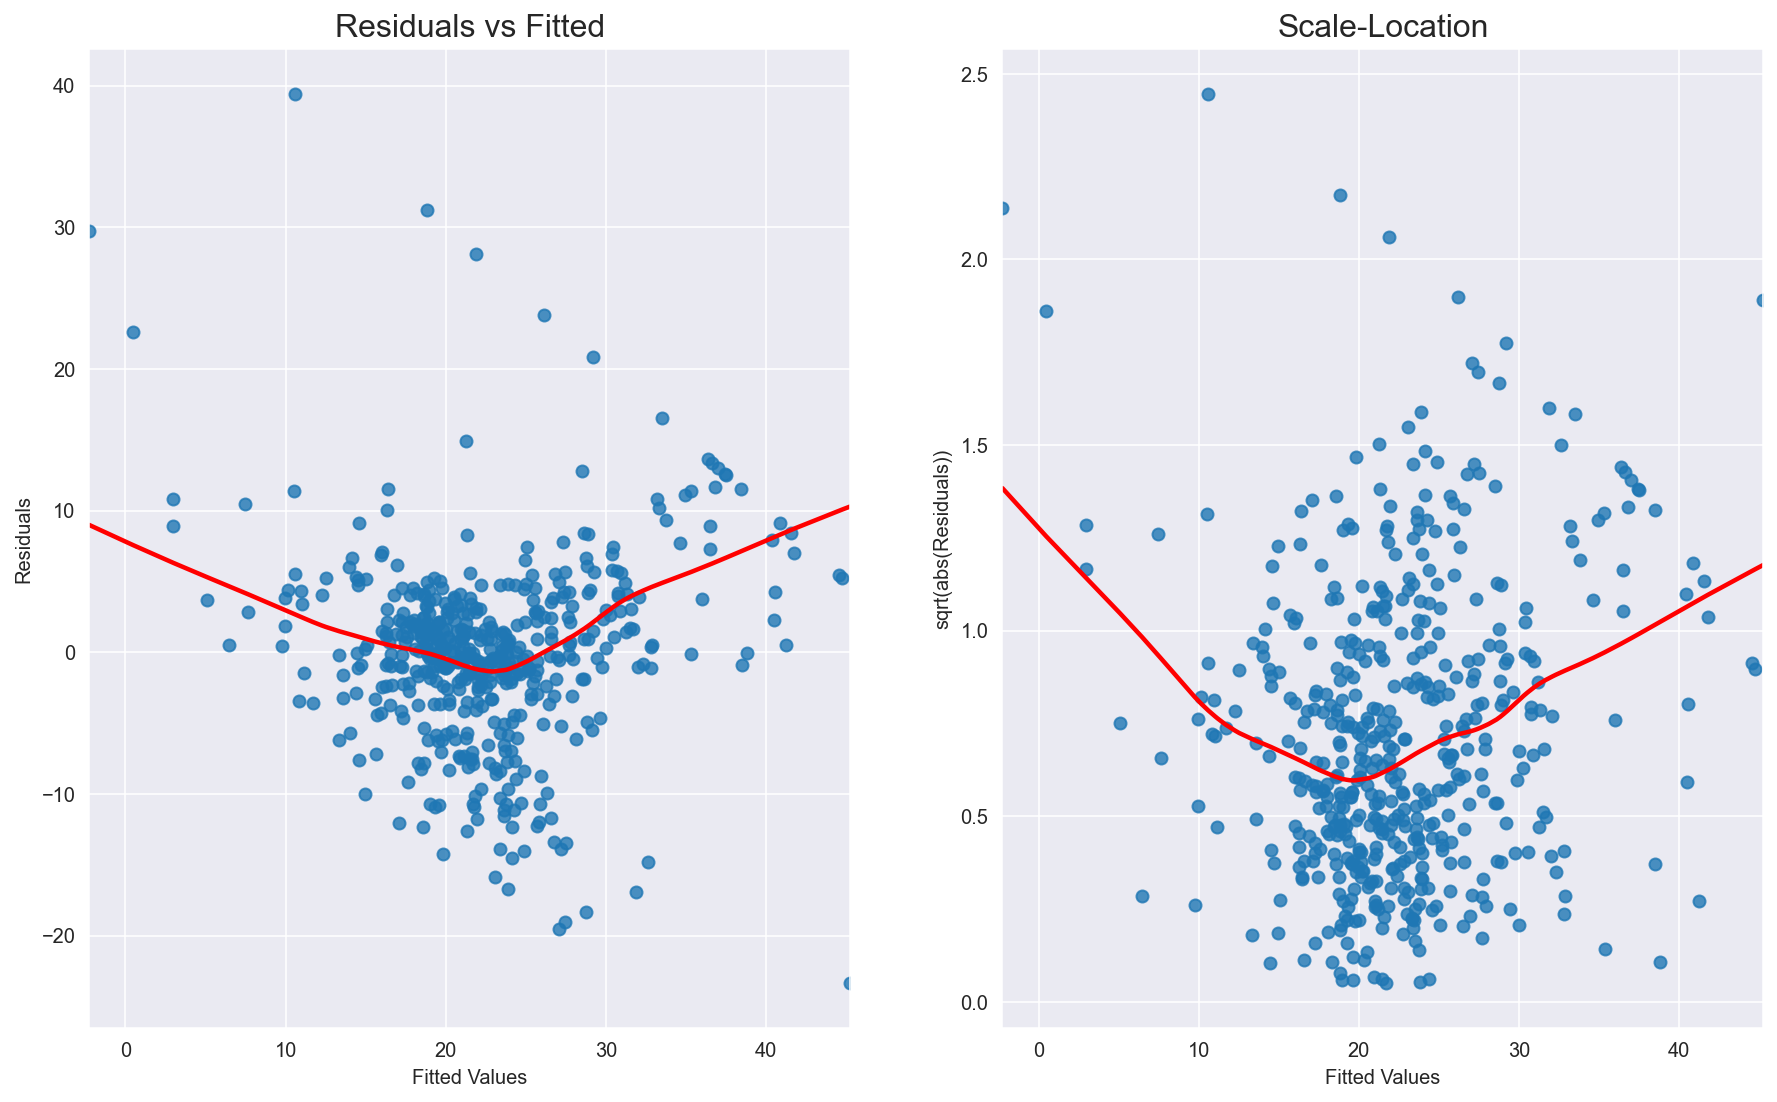

In [13]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    import numpy as np
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

La gráfica muestra que claramente este modelo no cumple el supuesto de homocedacia.
Por ende para sotear este incoveniente como dijimos antes podes aplicar alguna fucion logaritmica sobre las variables predictoras o sobre la variable target.

### Autocorrelación
Otro de los supuestos detrás del modelo de regresión lineal es que los residuales no tienen autocorrelación seriál. Una serie está autocorrelacionada cuando tiene correlación con su serie rezagada. Por ejemplo las series financieras en su gran mayoría tienen autocorrelación serial.

Para investigar si la autocorrelación está presente, utilizo gráficos ACF (función de autocorrelación) y la prueba de Durbin-Watson.
En el primer caso, queremos ver si el valor de ACF es significativo para cualquier retraso (en caso de que no haya datos de series temporales, se utiliza el número de fila). Al llamar a la función, indicamos el nivel de significación en el que estamos interesados y el área crítica se traza en el gráfico. Las correlaciones significativas se encuentran fuera de esa área.


Nota: cuando se trata de datos sin la dimensión de tiempo, alternativamente podemos trazar los residuos frente al número de fila. En tales casos, las filas deben ordenarse de una manera que (solo) dependa de los valores de las características.


El segundo enfoque es utilizar la prueba de Durbin-Watson. No detallo cómo se construye, pero proporciono una descripción general de alto nivel. El estadístico de prueba proporciona una prueba de autocorrelación residual significativa en el retraso 1. El estadístico DW es aproximadamente igual a 2 (1-a), donde a es la autocorrelación residual del retraso 1. La estadística de prueba DW se encuentra en la salida predeterminada de la regresión con statsModels.

Algunas notas sobre la prueba de Durbin-Watson:
* El estadistico de prueba siempre tiene un valor entre 0 y 4
* El valor de 2 significa que no hay autocorrelación en la muestra
* Valores <2 indican autocorrelación positiva, valores > 2 negativo uno.
Si vamos a la celda donde obtuvimos el modelo vemos un DW = 1.016

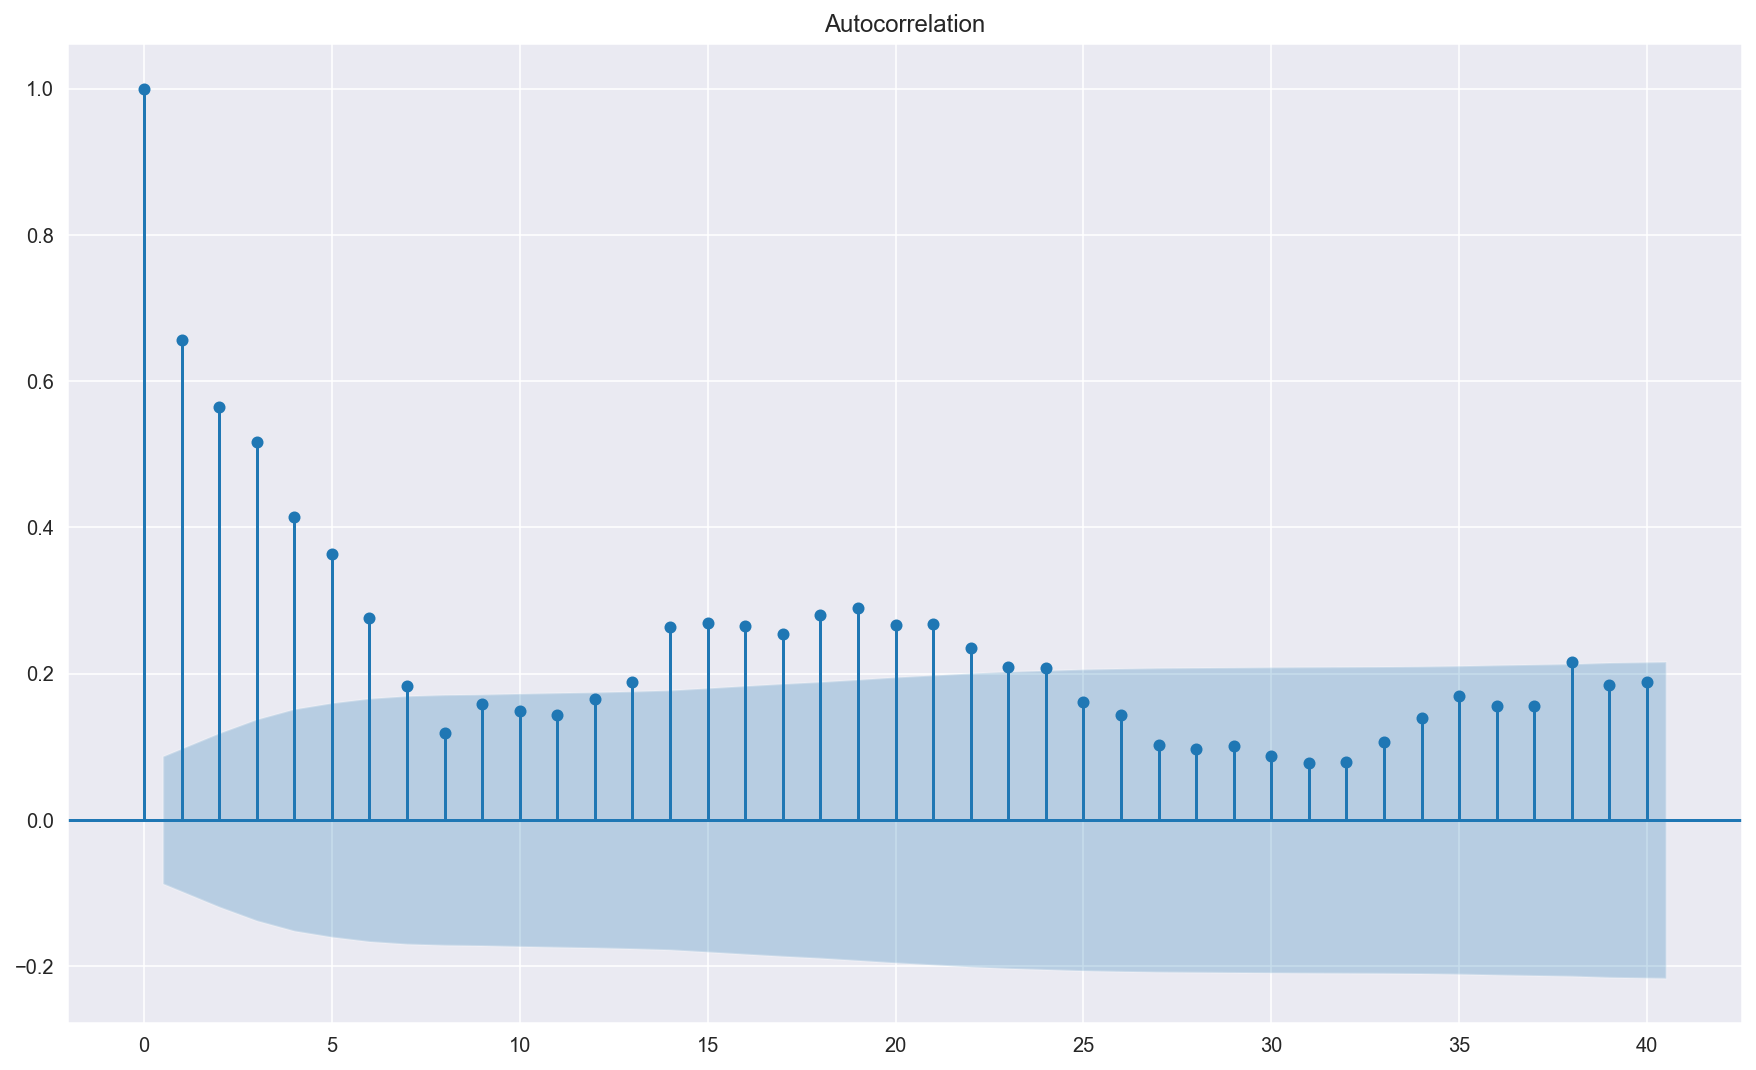

In [14]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
#acf.show();

### Normalidad de los residuos

Cuando se viola este supuesto , puede causar problemas al calcular los intervalos de confianza y varias pruebas de significancia para los coeficientes. Cuando la distribución del error se aleja significativamente de Gauss, los intervalos de confianza pueden ser demasiado amplios o demasiado estrechos.
Algunas de las posibles razones que causan residuos no normales:
* Presencia de algunos valores atípicos grandes en los datos
* Puede haber otros problemas (violaciones) con los supuestos del modelo
* Otra mejor especificación del modelo podría ser más adecuada para este problema.

Para investigar esta suposición podemos mirar:

* Gráficos QQ de los residuos. Por ejemplo, un patrón de desviaciones en forma de arco de la diagonal implica que los residuos tienen una inclinación excesiva (es decir, la distribución no es simétrica, con demasiados residuos grandes en una dirección). El patrón de desviaciones en forma de s implica una curtosis excesiva de los residuos: hay demasiados o dos pocos errores grandes en ambas direcciones.
*  Pruebas estadísticas como la prueba de Kolmogorov-Smirnov, la prueba de Shapiro-Wilk, la prueba de Jarque-Bera y la prueba de Anderson-Darling pueden ser utiles para evaluar este supuesto.

Jarque-Bera test ---- statistic: 612.4490, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9205, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3038, p-value: 0.0000
Anderson-Darling test ---- statistic: 9.5711, 5% critical value: 0.7810
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


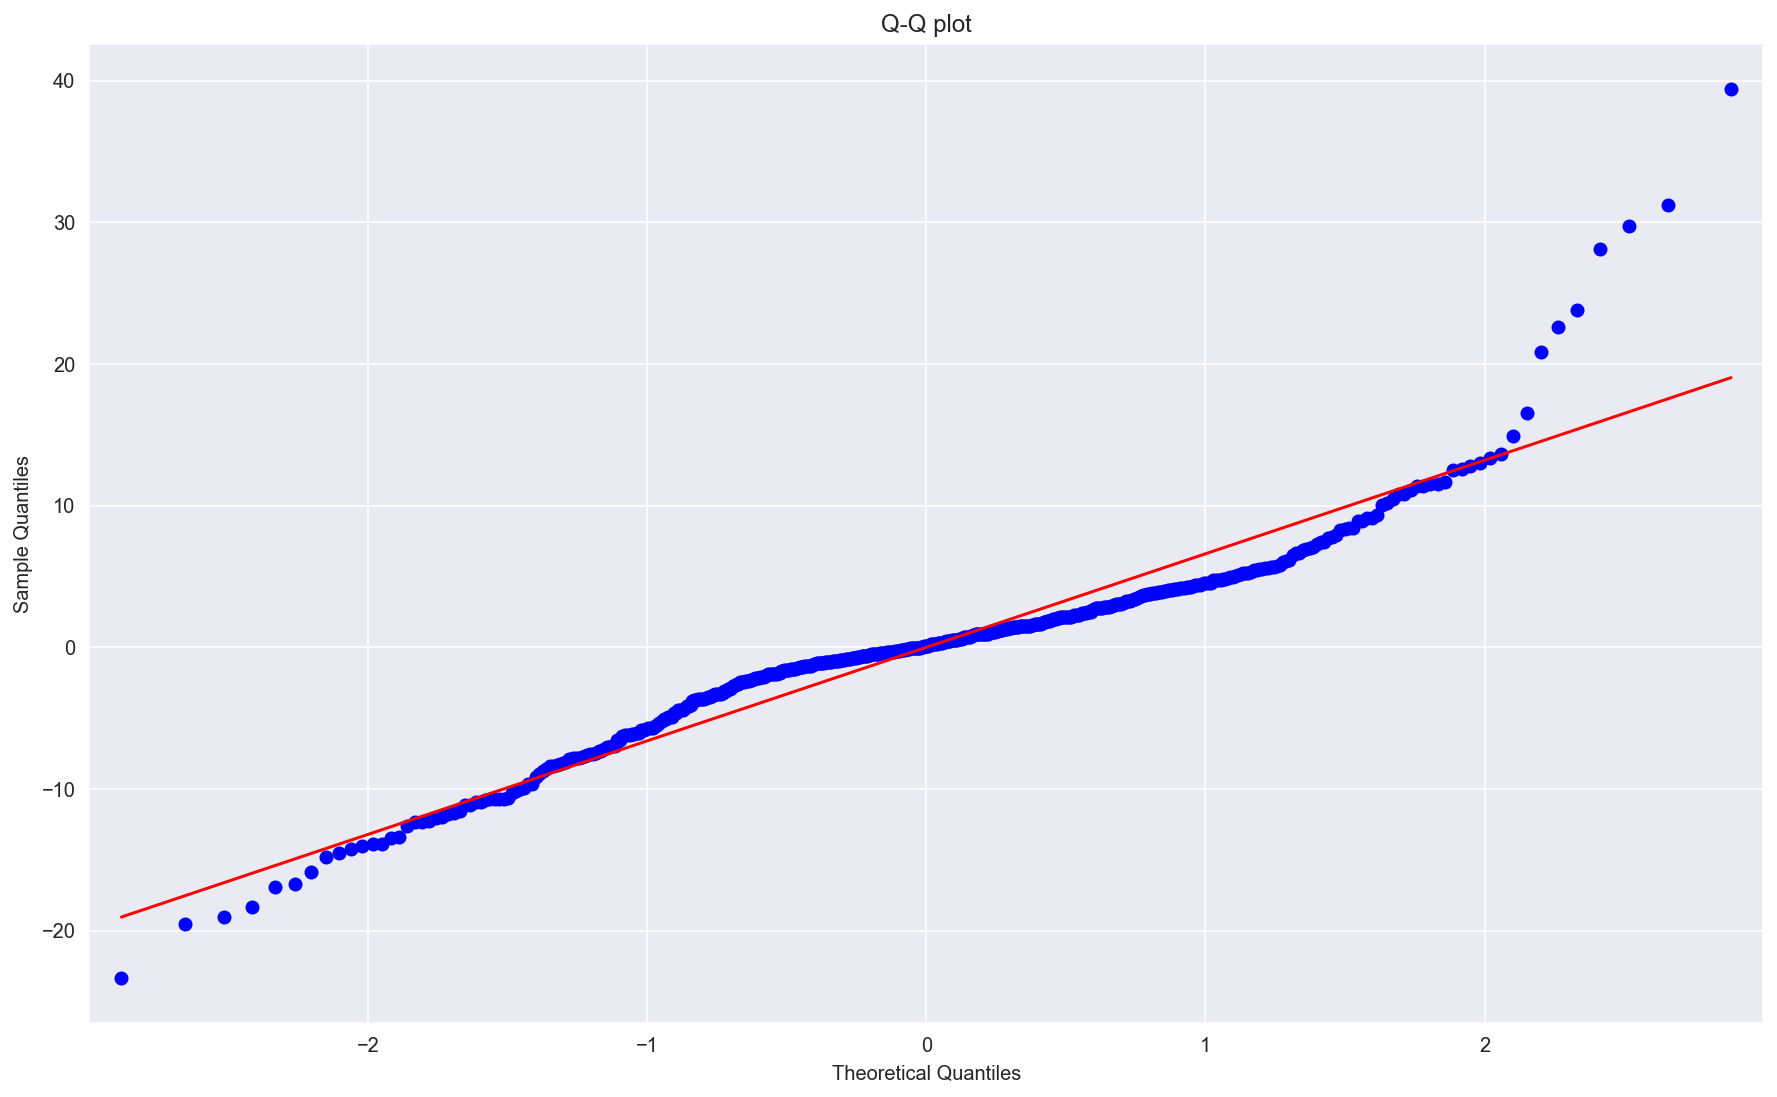

In [15]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

A partir de los resultados anteriores, podemos inferir que los residuos no siguen la distribución gaussiana, a partir de la forma de la gráfica QQ, así como rechazar la hipótesis nula en todas las pruebas estadísticas. 

#### Posibles soluciones:
* transformación no lineal de la variable o características objetivo
* eliminar / tratar posibles valores atípicos
* Puede suceder que haya dos o más subconjuntos de datos que tengan propiedades estadísticas diferentes, en cuyo caso podrían considerarse modelos separados

## Conclusiones:

En esta notebook se muestra  como entrenar un modelo de regresión lineal, cómo verificar si están satisfechos sus supuestos y cuáles son los posibles pasos que podemos tomar para solucionar los problemas subyacentes con el modelo. Recordar que no siempre verificamos estos supuestos. En un enfoque mas "predictivo" por ejemplo utilizando la biblioteca sklearn, el objetivo es evaluar la performance global del modelo y utilizarlo para predecir. Sin embargo esta notebook fue desarrollada para mostrar como es el enfoque del desarrollo de un modelo desde el punto de vista puramente estadístico.